# Project Steps Overview

- Step 1: Gathering data

- Step 2: Assessing data

- Step 3: Cleaning data

- Step 4: Storing data

- Step 5: Analyzing, and visualizing data

- Step 6: Reporting

    - your data wrangling efforts
    - your data analyses and visualizations

## Gathering Data

In [1]:
# import library
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer

##### Download & uploaded `twitter_archive_enhanced.csv` & read it

In [2]:
# download twitter archive file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

##### Download `image_predictions.tsv` from the URL using the `Request` library

In [3]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

##### Query each tweet's retweet count and favorite("like") count using `tweepy` library and store data in `tweet_json.txt

In [4]:
# # create API object
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_token_secret = 'HIDDEN'

# # authorization of consumer key and consumer secret
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  
# # set access to user's access key and access secret 
# auth.set_access_token(access_token, access_token_secret)
  
# # calling the api 
# api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

____________________

## Assessing Data
Detect and document at least eight (8) quality issues and two (2) tidiness issues

### Visual Assessment

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
status_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Quality: Visual Assessment
##### Twitter Archive
- Remove unused columns

- Strip `<a href=  </a>` from source records
           
- Remove `+0000` in timestamp record

- Replace `_` with space in the columns

##### Image Prediction
- Replace `_` with space in the columns 

- complete columns name 
 
##### Tweet Status


### Tidiness: Visual Assessment

- Split timesstamp records into two columns
- combined Tweet Status table with Image Prediction

### Programmatic Assessments

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [12]:
twitter_archive.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2106,670468609693655041,NaN,NaN,2015-11-28 05:05:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edd. He's a Czechoslovakian Googolplex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670468609...,10,10,Edd,None,None,None,None
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,None,None,None,None,None
418,822462944365645825,NaN,NaN,2017-01-20 15:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822462944...,14,10,Gabe,None,None,pupper,None
28,886680336477933568,NaN,NaN,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,None,None,None,None
1387,700505138482569216,NaN,NaN,2016-02-19 02:20:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaia. She's just cute as hell. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700505138...,12,10,Kaia,None,None,None,None
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None


In [13]:
img_df.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1257,748575535303884801,https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,1,muzzle,0.176172,False,seat_belt,0.160953,False,soft-coated_wheaten_terrier,0.086499,True
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
917,701570477911896070,https://pbs.twimg.com/media/Cbx6nz1WIAA0QSW.jpg,1,Yorkshire_terrier,0.907990,True,silky_terrier,0.076883,True,Australian_terrier,0.008473,True
737,687109925361856513,https://pbs.twimg.com/media/CYka1NTWMAAOclP.jpg,2,borzoi,0.883086,True,whippet,0.022934,True,Saluki,0.021606,True
1730,821044531881721856,https://pbs.twimg.com/media/C2Tvo20XcAAhNL9.jpg,1,Old_English_sheepdog,0.148020,True,Airedale,0.133534,True,Tibetan_mastiff,0.120903,True
1068,715928423106027520,https://pbs.twimg.com/media/Ce99GhLW8AAHG38.jpg,1,pug,0.976685,True,French_bulldog,0.019663,True,bull_mastiff,0.002278,True
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False


In [14]:
twitter_archive['doggo'].unique()

array(['None', 'doggo'], dtype=object)

In [15]:
twitter_archive['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [16]:
twitter_archive['pupper'].unique()

array(['None', 'pupper'], dtype=object)

In [17]:
twitter_archive['puppo'].unique()

array(['None', 'puppo'], dtype=object)

In [18]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [19]:
twitter_archive.tweet_id.nunique()

2356

In [20]:
twitter_archive[twitter_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
twitter_archive[twitter_archive.retweeted_status_user_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [22]:
twitter_archive[twitter_archive.retweeted_status_timestamp.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Quality: Programmatic Assessment
##### Twitter Archive
- Removing retweets

- Remove unused columns

- Strip `<a href=  </a>` from source records
           
- Remove `+0000` in timestamp record

- Replace `_` with space in the columns

- Replace name column type to category

- Replace timestamp column type 

##### Image Prediction
- Replace `_` with space in the columns 

- complete columns name 

- Replace p1, p2, p3 column type to category

##### Tweet Status


### Tidiness: Programmatic Assessment

- Split timesstamp records into two columns date & time
- combined Tweet Status table with Image Prediction
- combined four columns in df_twitter_clean

## Cleaning Data

In [23]:
# cope each data frame
df_twitter_clean = twitter_archive.copy()
df_img_clean = img_df.copy()
df_status_clean = status_df.copy()

#### Tidiness

##### Split timesstamp records into two columns date & time

##### Define
*Extract Date & time variable from timesstamp using `str.extract method`. Drop the timestamp column*

##### Code

In [24]:
# Extract Date from timestamp column 
df_twitter_clean['Date'] = df_twitter_clean['timestamp'].str.extract(r'(\d{4}-\d{2}-\d{2})')
# Extract Time from timestamp column 
df_twitter_clean['Time'] = df_twitter_clean['timestamp'].str.extract(r'(\d{2}:\d{2}:\d{2})')

# Drop timestamp column
df_twitter_clean.drop(columns=['timestamp'], inplace=True)


##### Test

In [25]:
df_twitter_clean[['Date', 'Time']].head()

,Date,Time
0,2017-08-01,16:23:56
1,2017-08-01,00:17:27
2,2017-07-31,00:18:03
3,2017-07-30,15:58:51
4,2017-07-29,16:00:24


In [26]:
df_twitter_clean.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,Time


##### combined Tweet Status table with Image Prediction

##### Define 
*Merge Image Prediction to the Tweet Status  , join them in the given tweet_id*

In [27]:
Image_Tweet_Prognosis = pd.merge(df_status_clean,df_img_clean, 
                                 on = ['tweet_id'], how = 'left')

##### Test

In [28]:
Image_Tweet_Prognosis

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666049248165822465,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2350,666044226329800704,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2351,666033412701032449,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2352,666029285002620928,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


##### combined four columns in df_twitter_clean

##### Define
*Add a column called `type_name_status` that checks if the dog type has a name and writes "None" if it does, or "Unknown" if all type columns contain the word "None," .Melt `doggo`, `floofer`, `pupper`, `puppo` & `type_name_status` in `Dog Type` name column & `Dog Breeds` in value column. Then Delete "None" records*

##### Code

In [29]:
# Create df that have the four columns
df_dog_type = df_twitter_clean[['tweet_id','doggo', 'floofer', 'pupper', 'puppo']]

# creat a copy 
df_dog_type_clean = df_dog_type.copy()

# Add the type_name_status column
df_dog_type_clean['type_name_status'] = df_dog_type_clean.apply(lambda row: 'Unknown' if all(row[['doggo', 'floofer', 'pupper', 'puppo']] == 'None') else 'None', axis=1)

# Melt the columns 
df_dog_type_clean = pd.melt(df_dog_type_clean, id_vars=['tweet_id'], var_name = 'dog Type', value_name = 'Dog Breeds')

# Delete None records
df_dog_type_clean = df_dog_type_clean.query('`Dog Breeds` != "None" ')

# Drop Dog Type column 
df_dog_type_clean.drop(columns = ['dog Type'], inplace = True)

# Merge df_dog_type_clean to df_twitter_clean
df_twitter_clean = pd.merge(df_twitter_clean, df_dog_type_clean, on = ['tweet_id'], how = 'left')

# Drop doggo, floofer, pupper, puppo columns
df_twitter_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)


In [30]:
df_dog_type_clean

,tweet_id,Dog Breeds
9,890240255349198849,doggo
43,884162670584377345,doggo
99,872967104147763200,doggo
108,871515927908634625,doggo
110,871102520638267392,doggo
...,...,...
11775,666049248165822465,Unknown
11776,666044226329800704,Unknown
11777,666033412701032449,Unknown
11778,666029285002620928,Unknown


In [31]:
df_twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Date,Time,Dog Breeds
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,Unknown
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,Unknown
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,Unknown
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,Unknown
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,666049248165822465,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,2015-11-16,00:24:50,Unknown
2366,666044226329800704,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,2015-11-16,00:04:52,Unknown
2367,666033412701032449,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,2015-11-15,23:21:54,Unknown
2368,666029285002620928,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,2015-11-15,23:05:30,Unknown


#### Quality
##### Twitter Archive
- Removing retweets

- Remove unused columns

- Strip `<a href=  </a>` from source records          

- Rename columns that have `_`

- Replace `name` & `Dog Breeds` column type to category

- convert Date column type to Date 

##### Image Tweet Prognosis
- Replace `_` with space in the columns 

- complete columns name 

- Convert First prediction, Second prediction, Third prediction columns type to category

##### `Twitter Archive`: Removing retweets

##### Define 
To remove retweets, we need to filter out rows with non-null values in the columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

##### Code

In [32]:
# Filter out retweets
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_id.isnull()]
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_user_id.isnull()]
df_twitter_clean = df_twitter_clean[df_twitter_clean.retweeted_status_timestamp.isnull()]

# After removing retweets, we can drop the retweet-related columns
df_twitter_clean = df_twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test

In [33]:
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,Time,Dog Breeds
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,Unknown
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,Unknown
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,Unknown
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,Unknown
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,Unknown


##### `Twitter Archive`: Remove unused columns

##### Define
*Drop the retweet & reply column in Twitter Archive table* 

##### Code

In [34]:
df_twitter_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id'], inplace = True)

##### Test

In [35]:
df_twitter_clean.head(0)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,Time,Dog Breeds


##### `Twitter Archive`: Strip `<a href=  </a>` from source records 

##### Define
*Remove `<a href=  </a>` by using replace method in source column*

##### Code

In [36]:
df_twitter_clean['source'] = df_twitter_clean['source'].str.replace('<a href="', '').str.replace('</a>', '')

##### Test

In [37]:
df_twitter_clean['source']

0       http://twitter.com/download/iphone" rel="nofol...
1       http://twitter.com/download/iphone" rel="nofol...
2       http://twitter.com/download/iphone" rel="nofol...
3       http://twitter.com/download/iphone" rel="nofol...
4       http://twitter.com/download/iphone" rel="nofol...
                              ...                        
2365    http://twitter.com/download/iphone" rel="nofol...
2366    http://twitter.com/download/iphone" rel="nofol...
2367    http://twitter.com/download/iphone" rel="nofol...
2368    http://twitter.com/download/iphone" rel="nofol...
2369    http://twitter.com/download/iphone" rel="nofol...
Name: source, Length: 2187, dtype: object

##### `Twitter Archive`: Rename columns that have `_`

##### Define
Rename the columns that have `_` instead of space by using rename method &  lambda

##### Code

In [38]:
df_twitter_clean.rename(columns=lambda x : x.replace('_', " "), inplace=True)

##### Test

In [39]:
df_twitter_clean.head(0)

,tweet id,source,text,expanded urls,rating numerator,rating denominator,name,Date,Time,Dog Breeds


##### `Twitter Archive`: Replace name column type to category

##### Define
*Convert name & Dog Breeds column to categorical data type*

##### Code

In [40]:
df_twitter_clean['name'] = df_twitter_clean['name'].astype('category')
df_twitter_clean['Dog Breeds'] = df_twitter_clean['Dog Breeds'].astype('category')

##### Test

In [41]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2369
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet id            2187 non-null   int64   
 1   source              2187 non-null   object  
 2   text                2187 non-null   object  
 3   expanded urls       2129 non-null   object  
 4   rating numerator    2187 non-null   int64   
 5   rating denominator  2187 non-null   int64   
 6   name                2187 non-null   category
 7   Date                2187 non-null   object  
 8   Time                2187 non-null   object  
 9   Dog Breeds          2187 non-null   category
dtypes: category(2), int64(3), object(5)
memory usage: 200.1+ KB


##### `Twitter Archive`: convert Date column type to Date

##### Define 
*Convert Date column from object to Date time*

##### Code

In [42]:
df_twitter_clean['Date'] = pd.to_datetime(df_twitter_clean['Date'])

##### Test

In [43]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2369
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet id            2187 non-null   int64         
 1   source              2187 non-null   object        
 2   text                2187 non-null   object        
 3   expanded urls       2129 non-null   object        
 4   rating numerator    2187 non-null   int64         
 5   rating denominator  2187 non-null   int64         
 6   name                2187 non-null   category      
 7   Date                2187 non-null   datetime64[ns]
 8   Time                2187 non-null   object        
 9   Dog Breeds          2187 non-null   category      
dtypes: category(2), datetime64[ns](1), int64(3), object(4)
memory usage: 200.1+ KB


##### `Image Tweet Prognosis`: Replace _ with space in the columns 

##### Define
*Rename the columns that have _ instead of space by using rename method & lambda*

##### Code

In [44]:
Image_Tweet_Prognosis.rename(columns=lambda x : x.replace("_", " "), inplace = True)

##### Test

In [45]:
Image_Tweet_Prognosis.head(0)

,tweet id,retweet count,favorite count,jpg url,img num,p1,p1 conf,p1 dog,p2,p2 conf,p2 dog,p3,p3 conf,p3 dog


##### `Image Tweet Prognosis`: complete columns name 

#### Define
*Apply a function that convert the wrong column name to the correct on by rename & lambda method using map method*

In [46]:
# Mapping the columns
column_name = {
    'jpg url': 'image url',
    'img num': 'image number',
    'p1': 'First Prediction',
    'p1 conf': 'First prediction of confident',
    'p1 dog': 'First prediction for breed of dog',
    'p2': 'Second prediction',
    'p2 conf': 'Second prediction of confident',
    'p2 dog': 'second prediction for breed of dog',
    'p3': 'Third prediction',
    'p3 conf': 'Third prediction of confident',
    'p3 dog': 'Third prediction for breed of dog'
}

# Function to apply
def correct_name(column):
    if column in column_name.keys():
        name = column_name[column]
        return name
    else:
        return column

# Applying the function to rename the columns using the map method
Image_Tweet_Prognosis = Image_Tweet_Prognosis.rename(columns=lambda x: correct_name(x))

##### Test

In [47]:
Image_Tweet_Prognosis.head()

,tweet id,retweet count,favorite count,image url,image number,First Prediction,First prediction of confident,First prediction for breed of dog,Second prediction,Second prediction of confident,second prediction for breed of dog,Third prediction,Third prediction of confident,Third prediction for breed of dog
0,892420643555336193,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


##### `Image Tweet Prognosis`: Convert First prediction, Second prediction, Third prediction columns type to category

##### Define 
*ConvertFirst prediction, Second prediction, Third prediction columns to categorical data type by using astype method*

##### Code

In [48]:
Image_Tweet_Prognosis['First Prediction'] = Image_Tweet_Prognosis['First Prediction'].astype('category')
Image_Tweet_Prognosis['Second prediction'] = Image_Tweet_Prognosis['Second prediction'].astype('category')
Image_Tweet_Prognosis['Third prediction'] = Image_Tweet_Prognosis['Third prediction'].astype('category')

##### Test

In [49]:
Image_Tweet_Prognosis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   tweet id                            2354 non-null   int64   
 1   retweet count                       2354 non-null   int64   
 2   favorite count                      2354 non-null   int64   
 3   image url                           2073 non-null   object  
 4   image number                        2073 non-null   float64 
 5   First Prediction                    2073 non-null   category
 6   First prediction of confident       2073 non-null   float64 
 7   First prediction for breed of dog   2073 non-null   object  
 8   Second prediction                   2073 non-null   category
 9   Second prediction of confident      2073 non-null   float64 
 10  second prediction for breed of dog  2073 non-null   object  
 11  Third prediction              

### Tidiness: Programmatic Assessment

- Merging the both dataframes

##### Tidiness

##### Merging the both dataframes

##### Define
merge both dataframes (df_twitter_clean, Image_Tweet_Prognosis) into a single master dataframe twitter_archive_master


##### Code

In [50]:
# Merge df_1_clean and df_2_clean
twitter_archive_master = pd.merge(df_twitter_clean, Image_Tweet_Prognosis, on='tweet id')

##### Test

In [51]:
twitter_archive_master

,tweet id,source,text,expanded urls,rating numerator,rating denominator,name,Date,Time,Dog Breeds,...,image number,First Prediction,First prediction of confident,First prediction for breed of dog,Second prediction,Second prediction of confident,second prediction for breed of dog,Third prediction,Third prediction of confident,Third prediction for breed of dog
0,892420643555336193,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,Unknown,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,Unknown,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,"http://twitter.com/download/iphone"" rel=""nofol...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,Unknown,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,"http://twitter.com/download/iphone"" rel=""nofol...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,Unknown,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,"http://twitter.com/download/iphone"" rel=""nofol...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,Unknown,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,666049248165822465,"http://twitter.com/download/iphone"" rel=""nofol...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,2015-11-16,00:24:50,Unknown,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2183,666044226329800704,"http://twitter.com/download/iphone"" rel=""nofol...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,2015-11-16,00:04:52,Unknown,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2184,666033412701032449,"http://twitter.com/download/iphone"" rel=""nofol...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,2015-11-15,23:21:54,Unknown,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2185,666029285002620928,"http://twitter.com/download/iphone"" rel=""nofol...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,2015-11-15,23:05:30,Unknown,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Storing Data

In [52]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data

## Analyzing Data

In [53]:
# Create a copy to analyze data
df = twitter_archive_master.copy()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2186
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   tweet id                            2187 non-null   int64         
 1   source                              2187 non-null   object        
 2   text                                2187 non-null   object        
 3   expanded urls                       2129 non-null   object        
 4   rating numerator                    2187 non-null   int64         
 5   rating denominator                  2187 non-null   int64         
 6   name                                2187 non-null   category      
 7   Date                                2187 non-null   datetime64[ns]
 8   Time                                2187 non-null   object        
 9   Dog Breeds                          2187 non-null   category      
 10  retweet count           

### Analysis of rating of dogs

#####  Rate of the evaluation for dogs

In [55]:
evaluation_propotion = df['rating numerator'] / df['rating denominator']
evaluation_propotion

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2182    0.5
2183    0.6
2184    0.9
2185    0.7
2186    0.8
Length: 2187, dtype: float64

#### Count the numerator ratting

In [56]:
df['rating numerator'].value_counts()

12      506
10      443
11      428
13      309
9       156
8        98
7        54
14       43
5        37
6        32
3        19
4        17
2         9
1         8
420       2
0         2
17        1
45        1
60        1
143       1
44        1
99        1
121       1
20        1
26        1
144       1
80        1
165       1
50        1
204       1
1776      1
27        1
75        1
24        1
84        1
960       1
15        1
182       1
666       1
88        1
Name: rating numerator, dtype: int64

#### Count the denominator ratting

In [57]:
df['rating denominator'].value_counts()

10     2165
50        3
11        2
20        2
80        2
15        1
70        1
7         1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating denominator, dtype: int64

### Analyzing the retweet & favorite

##### Retweet & Favorite means

In [58]:
print('Mean Retweet Count: ', round(df['retweet count'].mean()))
print('Mean Favorite Count: ', round(df['favorite count'].mean()))

Mean Retweet Count:  2771
Mean Favorite Count:  8783


##### Propotion of the rate for each like against retweet

In [59]:
prop = df['favorite count'] / df['retweet count']
prop

0       4.458037
1       5.191741
2       5.882856
3       4.786702
4       4.199714
          ...   
2182    2.707317
2183    2.115646
2184    2.723404
2185    2.750000
2186    4.765038
Length: 2187, dtype: float64

In [60]:
mean_prop = df['favorite count'].mean() / df['retweet count'].mean()
mean_prop

3.1691967101597553

##### Propotion of the rate for each retweet against like

In [61]:
prop = df['retweet count'] / df['favorite count']
prop

0       0.224314
1       0.192614
2       0.169985
3       0.208912
4       0.238111
          ...   
2182    0.369369
2183    0.472669
2184    0.367188
2185    0.363636
2186    0.209862
Length: 2187, dtype: float64

In [62]:
mean_prop = df['retweet count'].mean() / df['favorite count'].mean()
mean_prop

0.31553737159773565

### Analyzing number of tweets posted

In [63]:
df['Date'].value_counts().sort_index()

2015-11-15     3
2015-11-16    25
2015-11-17    15
2015-11-18    18
2015-11-19    23
              ..
2017-07-28     2
2017-07-29     2
2017-07-30     1
2017-07-31     1
2017-08-01     2
Name: Date, Length: 600, dtype: int64

### Most used Twitter source

In [64]:
df['source'].value_counts()

http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone     2053
http://vine.co" rel="nofollow">Vine - Make a Scene                          92
http://twitter.com" rel="nofollow">Twitter Web Client                       31
https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck      11
Name: source, dtype: int64

## Visualizing Data

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

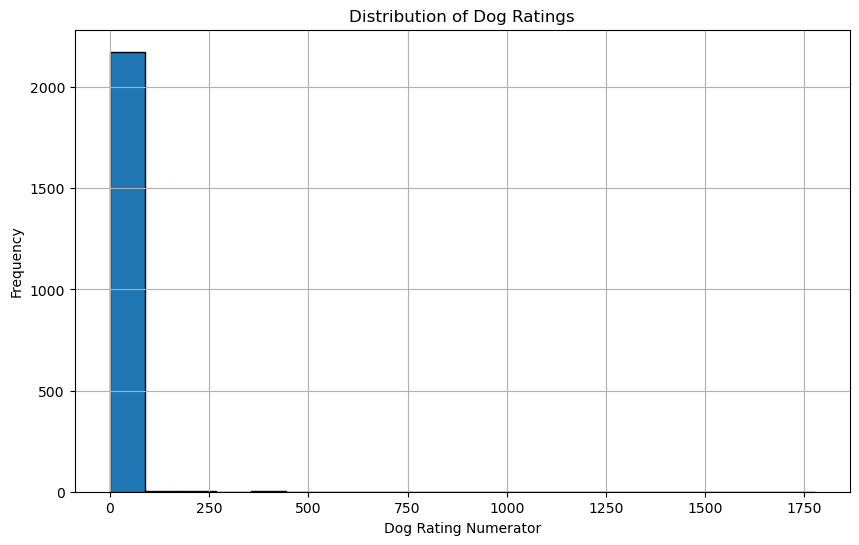

In [67]:
# Plotting the distribution of dog ratings
plt.figure(figsize=(10, 6))
plt.hist(df['rating numerator'], bins=20, edgecolor='k')
plt.xlabel('Dog Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Dog Ratings')
plt.grid(True)
plt.savefig('dog_ratings_distribution.png')  # Save the plot as an image
plt.show()

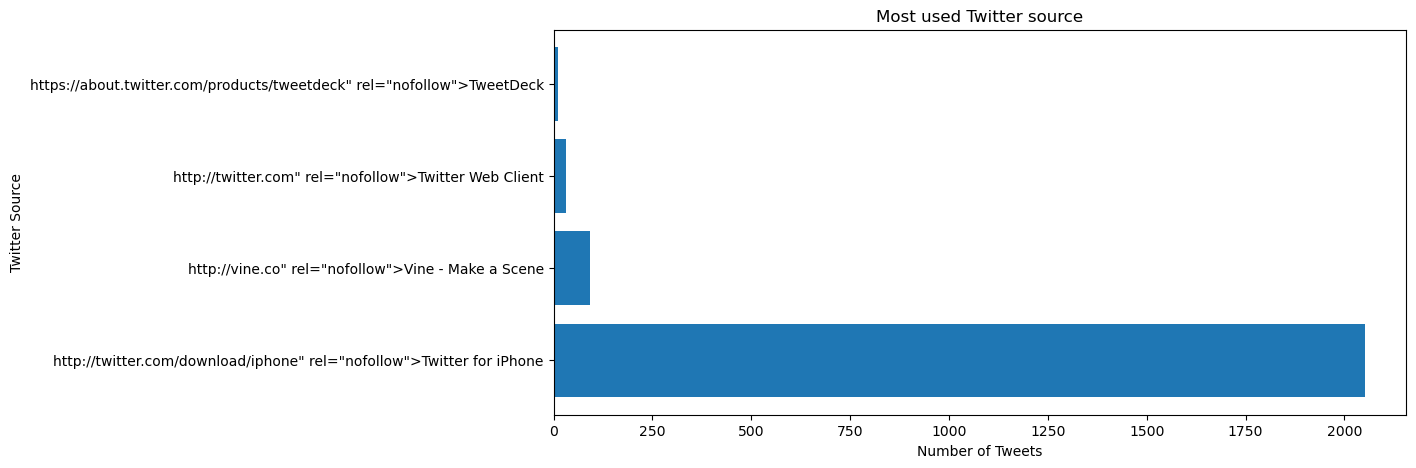

In [68]:
# Calculate the value counts of each Twitter source
source_counts = df['source'].value_counts()

# Create the horizontal bar plot
plt.figure(figsize=(11, 5))
plt.barh(source_counts.index, source_counts.values)

# Set title and labels
plt.title('Most used Twitter source')
plt.xlabel('Number of Tweets')
plt.ylabel('Twitter Source')

# Show the plot
plt.show()